In [2]:
import pandas as pd   

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [7]:
from scipy.stats import zscore           # is used to calculate the z-score of a set of values.

In [8]:
file=pd.read_csv(r"C:\Users\HOME\Downloads\archive (5)\car data.csv")

In [133]:
file


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,0,0,Manual,0
298,city,2009,3.35,11.00,87934,0,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [10]:
file.isnull().sum()   # it will tell how many missing columns are there in each column

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
file.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
file.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
file.Fuel_Type.value_counts()   #distribution of data


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [15]:
file.Seller_Type.value_counts()


Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [16]:
file.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split   

In [18]:
from scipy import stats

In [19]:
z_scores=stats.zscore(file["Kms_Driven"])      # to standardize a dataset by computing the z_score of each data point.

In [20]:
z_scores

0     -0.256224
1      0.155911
2     -0.773969
3     -0.817758
4      0.141743
         ...   
296   -0.076225
297    0.593804
298    1.313340
299   -0.719876
300   -0.810958
Name: Kms_Driven, Length: 301, dtype: float64

In [21]:
threshold=2 

In [22]:
outlierdata = z_scores.abs()>threshold                   # is used to identify outliers based on their z-scores

In [23]:
df_no_outlier=file[~outlierdata]  #If the absolute z-score of a data point is greater than these threshold it's considered an outlier

In [24]:
df_no_outlier

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [25]:
file.shape

(301, 9)

In [26]:
df_no_outlier.shape

(294, 9)

<Axes: ylabel='Kms_Driven'>

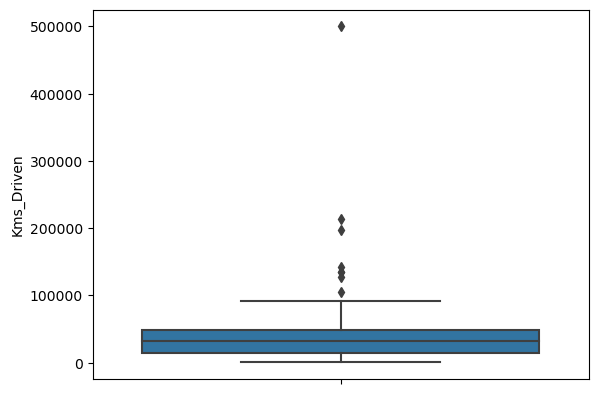

In [27]:
sns.boxplot(data=file,y="Kms_Driven")

<Axes: ylabel='Kms_Driven'>

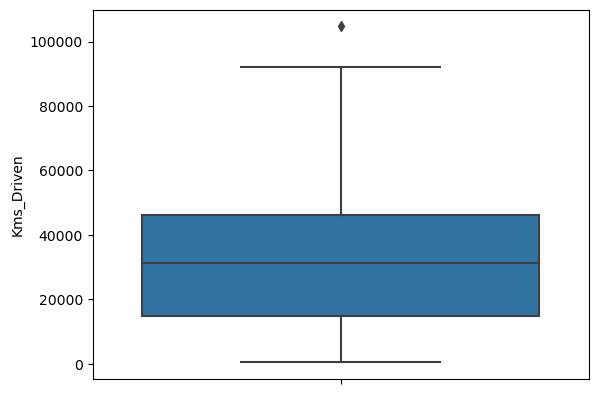

In [28]:
sns.boxplot(data=df_no_outlier,y="Kms_Driven")

In [29]:
new_df=file[["Selling_Price","Present_Price"]]                  #created a new dataframe

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

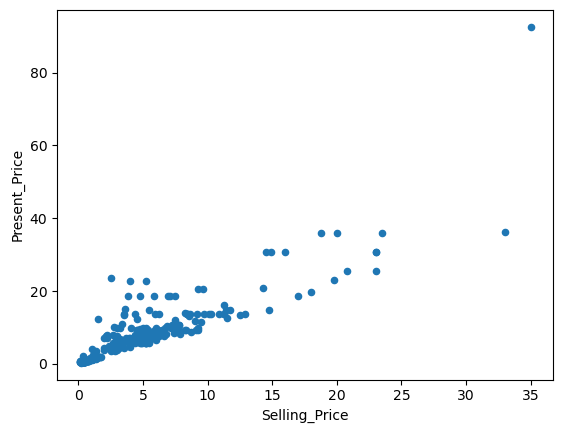

In [30]:
new_df.plot(x="Selling_Price",y="Present_Price",kind="scatter")

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
X=file["Selling_Price"]                     #it defines x and y using the new dataframe

In [33]:
X

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [34]:
Y=file["Present_Price"]

In [35]:
Y

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64

In [36]:
# putting all the training data in X train and all the testing data in the X test


In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)     #it splits the data as train and test

In [ ]:
# all the values in the X train will be stored in Y train ,and X test will be stored in Y test

In [37]:
print("X_train:",X_train.shape)                           # the x train and y train should be of same size
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test :",Y_test.shape)

X_train: (240,)
X_test: (61,)
Y_train: (240,)
Y_test : (61,)


In [38]:
X_train=np.array(X_train).reshape(-1,1)                     #because we have only one independent variable

In [39]:
Y_test=np.array(Y_test).reshape(-1,1)

In [40]:
X_test=np.array(X_test).reshape(-1,1)

In [41]:
linear_reg=LinearRegression()

In [42]:
linear_reg.fit(X_train,Y_train)                # fit function is used to train our model

LinearRegression()

In [43]:
ypred1 = linear_reg.predict(X_train)

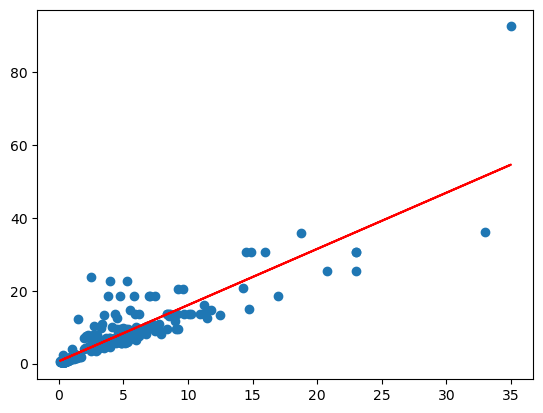

In [44]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,ypred1,color="red")
plt.show()

In [45]:
ypred2 = linear_reg.predict(X_test)

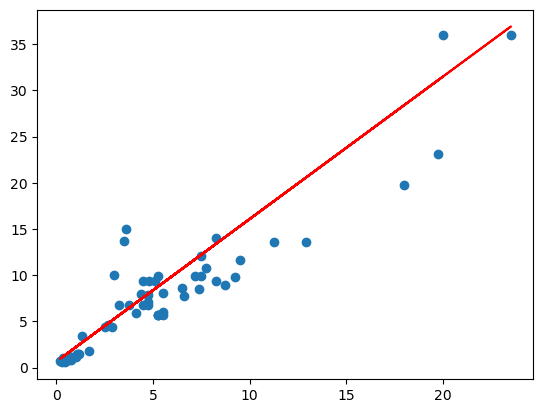

In [46]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,ypred2,color="red")
plt.show()

In [47]:
from sklearn.metrics import accuracy_score,precision_score

In [48]:
from sklearn import metrics  # is used to evalute the model 

In [49]:
error_score = metrics.r2_score(X_train,ypred1)

In [50]:
error_score

0.33306026368269914

In [51]:
error_score = metrics.r2_score(X_test,ypred2)

In [52]:
error_score

0.22754358492190896

# Logisitic Regression

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
file.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0


In [119]:
file.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [120]:
file

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,0,0,Manual,0
298,city,2009,3.35,11.00,87934,0,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [121]:
X=file.drop(columns=['Car_Name','Year','Transmission','Fuel_Type'],axis=1) # splitting the data target

In [122]:
X

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Owner
0,3.35,5.59,27000,0,0
1,4.75,9.54,43000,0,0
2,7.25,9.85,6900,0,0
3,2.85,4.15,5200,0,0
4,4.60,6.87,42450,0,0
...,...,...,...,...,...
296,9.50,11.60,33988,0,0
297,4.00,5.90,60000,0,0
298,3.35,11.00,87934,0,0
299,11.50,12.50,9000,0,0


In [123]:
Y=file["Fuel_Type"]

In [124]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
296    1
297    0
298    0
299    1
300    0
Name: Fuel_Type, Length: 301, dtype: int64

In [125]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [126]:
logistic=LogisticRegression()


In [127]:
logistic.fit(X_train,Y_train)

C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
Predictions=logistic.predict(X_test)

In [129]:
Predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [130]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [131]:
accuracy=accuracy_score(Y_test,Predictions)

In [132]:
accuracy

0.7213114754098361